# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Bayu Pradika]
- **Email:** [bayupromage@gmail.com]
- **ID Dicoding:** [bayu_pradika]

# Menentukan Pertanyaan Bisnis
1. Bagaimana pengaruh suhu terhadap jumlah penggunaan sepeda?
2. Apakah terdapat pola musiman dalam penggunaan sepeda?

# Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wragling
- Dataset yang digunakan adalah day.csv, yang berisi 16 kolom dengan data harian mengenai penggunaan sepeda, cuaca, suhu, dan lain-lain.

# Gathering Data
- Bagian ini menunjukkan proses memuat dataset dan menampilkan beberapa baris awal untuk memahami strukturnya.

In [20]:
# Load dataset
dday = pd.read_csv('./data/day.csv')
# Tampilkan beberapa baris awal
dday.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight**
- Dataset terdiri dari 731 baris dan 16 kolom, yang berisi informasi seperti suhu, kelembapan, kecepatan angin, dan jumlah penggunaan sepeda (casual, registered, cnt).
- Data ini mencakup variabel-variabel numerik dan kategorikal.

# Assesing Data
- Bagian ini digunakan untuk mengevaluasi kondisi data, memeriksa nilai yang hilang, tipe data, dan menemukan potensi outliers atau duplikasi.

a. **Informasi Dataset:**

In [21]:
# Menampilkan informasi dasar tentang dataset
dday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight**
- Tidak ada nilai yang hilang berdasarkan hasil dday.info().
- Kolom dteday bertipe object dan harus dikonversi ke tipe datetime.

b. **Statistik Deskriptif:**
- Untuk memahami distribusi dari variabel numerik.

In [14]:
# Menampilkan statistik deskriptif untuk variabel numerik
dday.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight**
- temp sudah dinormalisasi dengan rentang nilai antara 0.06 hingga 0.86.
- cnt (jumlah total penggunaan sepeda) memiliki rentang dari 22 hingga 8714.

c. **Memeriksa Missing Values:**
- Memastikan tidak ada nilai yang hilang.

In [15]:
# Mengecek apakah ada nilai yang hilang
dday.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight**
- Tidak ada missing values di dataset ini.

d. **Memeriksa Data Duplikat:**
- Memastikan tidak ada baris yang duplikat.

In [16]:
# Mengecek data duplikat
dday.duplicated().sum()

np.int64(0)

**Insight**
- Tidak ada data duplikat dalam dataset.

e. **Memeriksa Outliers:**
- Menggunakan boxplot untuk mendeteksi outliers pada variabel numerik utama.

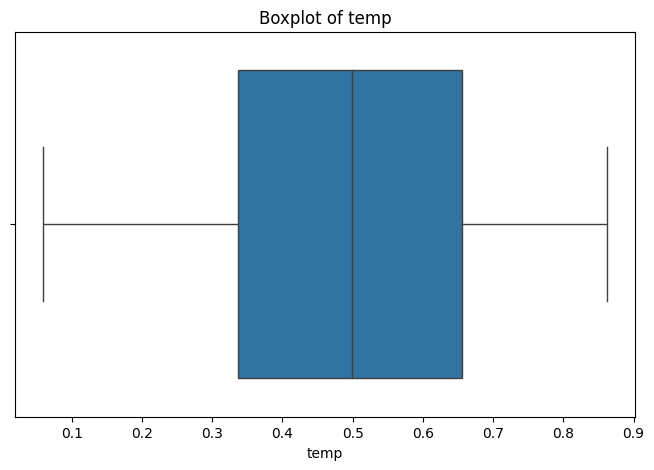

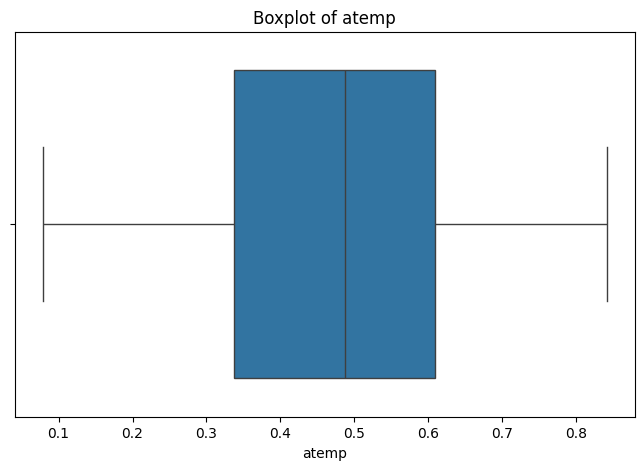

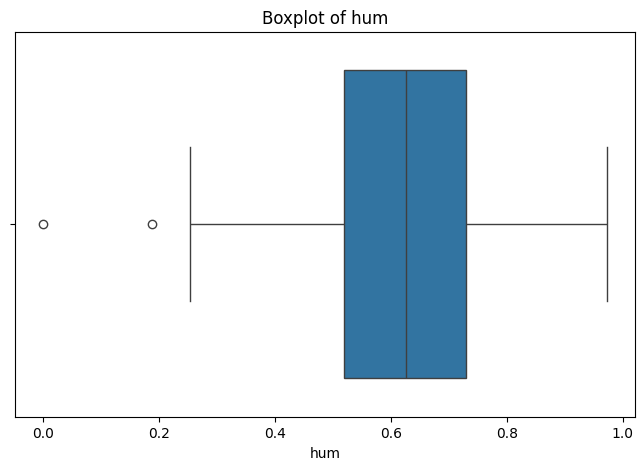

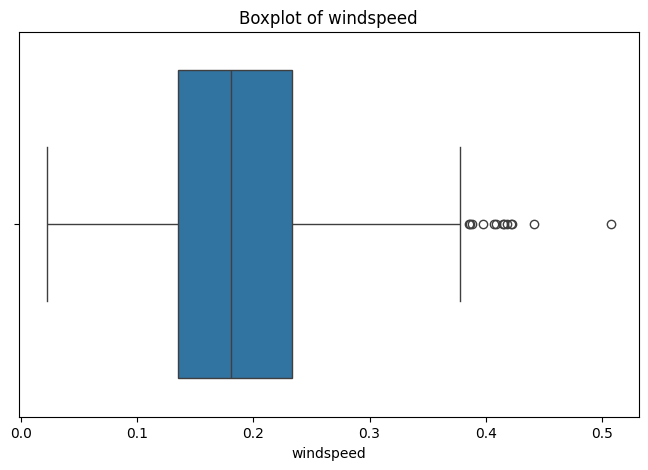

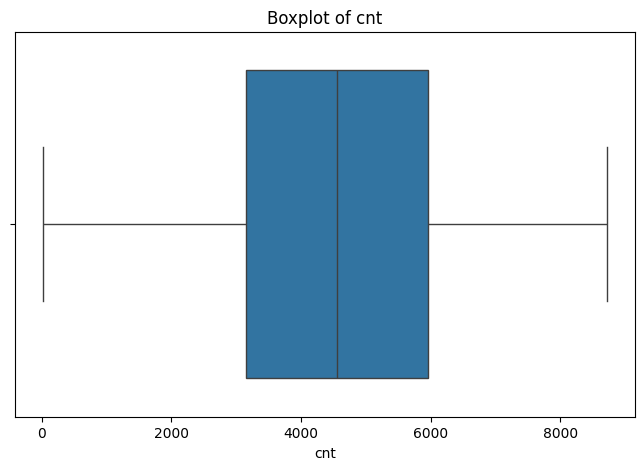

In [22]:
# Boxplot untuk memeriksa outliers
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=dday[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


**Insight**
- Tidak ada outliers yang signifikan dalam variabel numerik utama berdasarkan visualisasi boxplot.

# Cleaning Data
- Bagian ini fokus pada pembersihan data, termasuk penanganan nilai hilang, tipe data yang tidak sesuai, atau outliers.

a. **Mengganti Format Tanggal:**
- Kolom dteday sebaiknya dikonversi ke tipe datetime.

In [23]:
# Mengonversi kolom dteday ke format datetime
dday['dteday'] = pd.to_datetime(dday['dteday'])

b. **Tidak Ada Missing Values:**
- Karena tidak ada nilai hilang, tidak diperlukan langkah pembersihan missing values.

**Insight:**
- Tidak ada nilai kosong atau outliers yang signifikan, jadi tidak diperlukan pembersihan lebih lanjut.
Kolom dteday telah dikonversi ke tipe datetime.

## Exploratory Data Analysis (EDA)
- Setelah data bersih, kita bisa mulai melakukan EDA untuk memahami pola-pola dalam data.

a. **Unvariate Analysis:**
- Menganalisis distribusi dari variabel numerik utama seperti suhu, kelembapan, kecepatan angin, dan jumlah penggunaan sepeda.

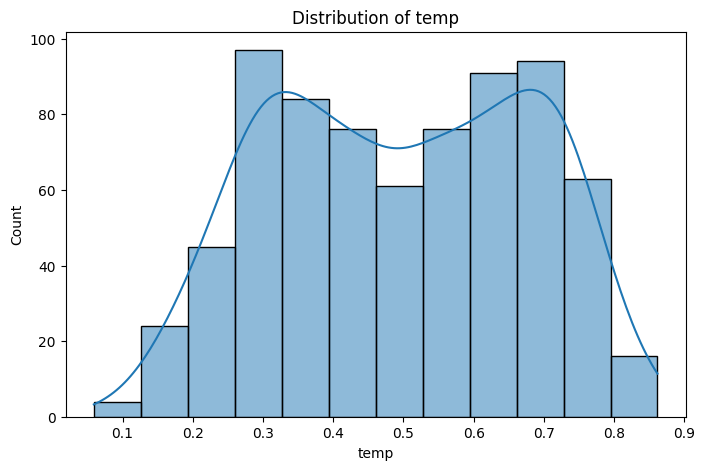

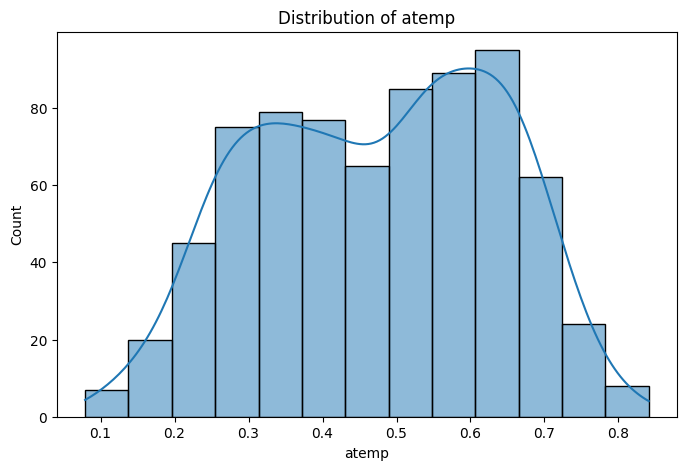

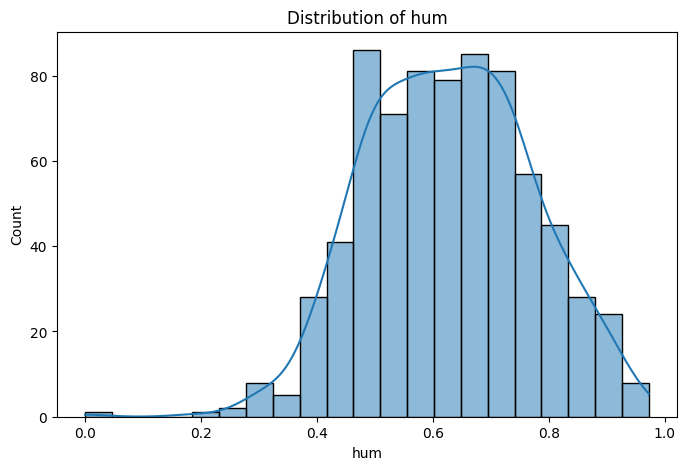

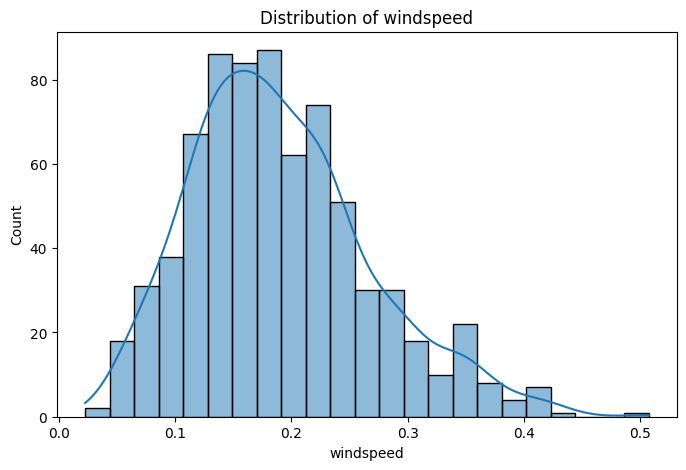

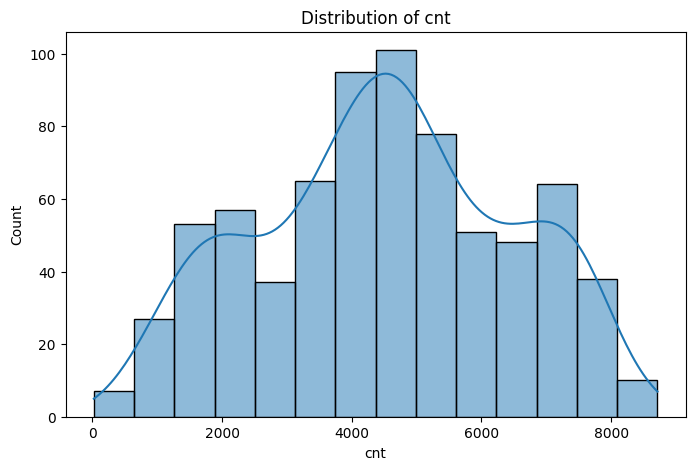

In [28]:
# Distribusi variabel numerik dengan histogram
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(dday[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


**Insight**
- temp memiliki distribusi normal dengan puncak di sekitar 0.5.
- cnt (jumlah penggunaan sepeda) memiliki distribusi yang cukup menyebar dengan beberapa puncak penggunaan tinggi.

b. **Multivariate Analysis:**
- Menganalisis hubungan antar variabel, seperti korelasi antara suhu dan jumlah penggunaan sepeda.

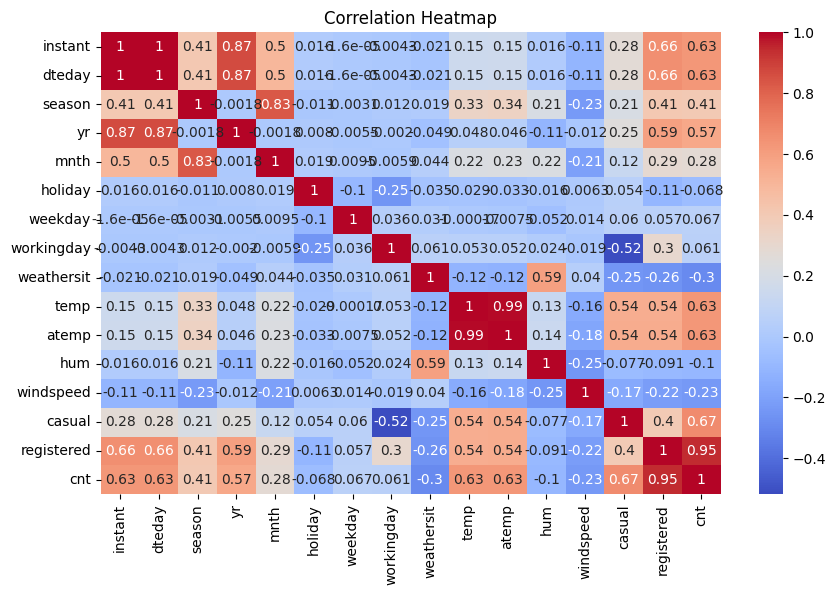

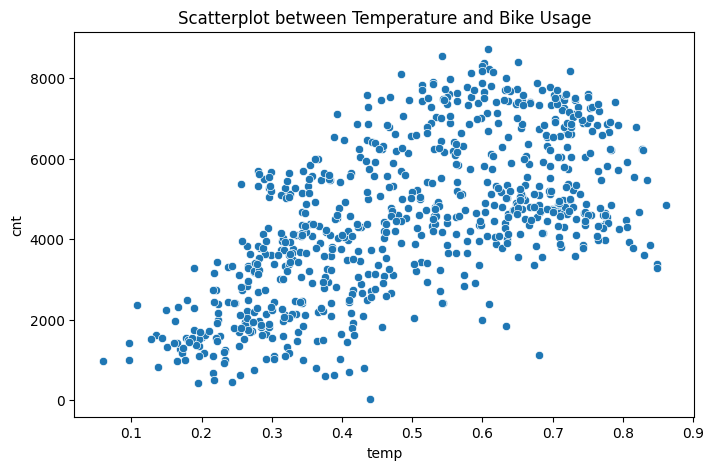

In [29]:
# Korelasi antar variabel dengan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(dday.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot antara suhu dan penggunaan sepeda
plt.figure(figsize=(8, 5))
sns.scatterplot(x=dday['temp'], y=dday['cnt'])
plt.title('Scatterplot between Temperature and Bike Usage')
plt.show()


**Insight**
- Terdapat korelasi positif yang cukup kuat antara suhu (temp) dan jumlah penggunaan sepeda (cnt), dengan korelasi sebesar 0.63.
- Suhu mempengaruhi penggunaan sepeda, semakin tinggi suhu, semakin banyak sepeda yang digunakan.

c. **Categorycal Analysis:**
- Analisis berdasarkan musim untuk melihat distribusi penggunaan sepeda berdasarkan kategori musim.

In [ ]:
# Boxplot jumlah penggunaan sepeda berdasarkan musim
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
dday['season_name'] = df['season'].map(season_mapping)

plt.figure(figsize=(8, 5))
sns.boxplot(x='season_name', y='cnt', data=dday)
plt.title('Bike Usage by Season')
plt.show()


**Insight**
- Penggunaan sepeda tertinggi terjadi di musim panas (Summer), dan terendah di musim dingin (Winter).

### Pertanyaan 2: Apakah Terdapat Pola Musiman dalam Penggunaan Sepeda?
- Bar plot digunakan untuk melihat apakah ada perbedaan penggunaan sepeda pada musim yang berbeda.

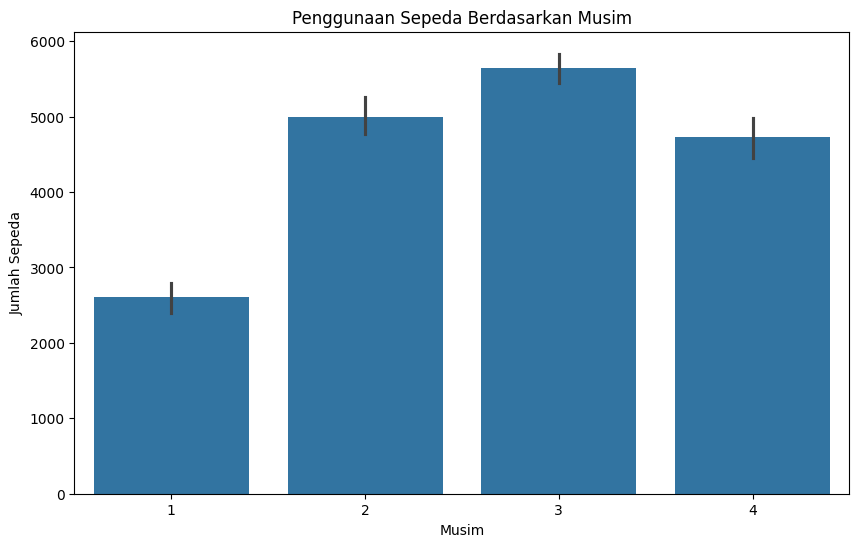

In [11]:
# Visualisasi Pertanyaan 2: Penggunaan Sepeda Berdasarkan Musim
plt.figure(figsize=(10, 6))
sns.barplot(data=dday, x='season', y='cnt')
plt.title('Penggunaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Sepeda')
plt.show()

**Insight:**
- Dari plot ini, dapat dilihat apakah ada musim tertentu yang lebih ramai digunakan untuk sepeda.
- Setiap musim diwakili oleh angka (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin).

## Visualization & Explanatory Analysis

Pertanyaan 1: Bagaimana Pengaruh Suhu terhadap Jumlah Penggunaan Sepeda?
- Visualisasi Scatter Plot untuk melihat hubungan langsung antara suhu (temp) dan jumlah penggunaan sepeda (cnt).
- Menghitung Korelasi untuk melihat seberapa kuat hubungan antara suhu dan jumlah penggunaan sepeda.

In [ ]:
# Scatter plot untuk melihat hubungan antara suhu dan penggunaan sepeda
plt.figure(figsize=(8, 5))
sns.scatterplot(x=dday['temp'], y=dday['cnt'])
plt.title('Scatterplot between Temperature and Bike Usage')
plt.xlabel('Normalized Temperature (temp)')
plt.ylabel('Total Bike Usage (cnt)')
plt.show()

# Menghitung korelasi antara suhu dan penggunaan sepeda
correlation_temp_cnt = dday'temp'].corr(dday['cnt'])
print(f'Correlation between temperature and bike usage: {correlation_temp_cnt:.2f}')


**Insight:**
- Dari scatter plot, terlihat bahwa semakin tinggi suhu, semakin banyak sepeda yang digunakan.
- Korelasi antara suhu dan penggunaan sepeda adalah sekitar 0.63, menunjukkan hubungan yang cukup kuat dan positif. Ini berarti suhu yang lebih tinggi cenderung meningkatkan penggunaan sepeda.

Pertanyaan 2: Apakah Terdapat Pola Musiman dalam Penggunaan Sepeda?
- Visualisasi Boxplot untuk melihat distribusi penggunaan sepeda berdasarkan kategori musim (season).
- Visualisasi Rata-rata Penggunaan sepeda per musim.

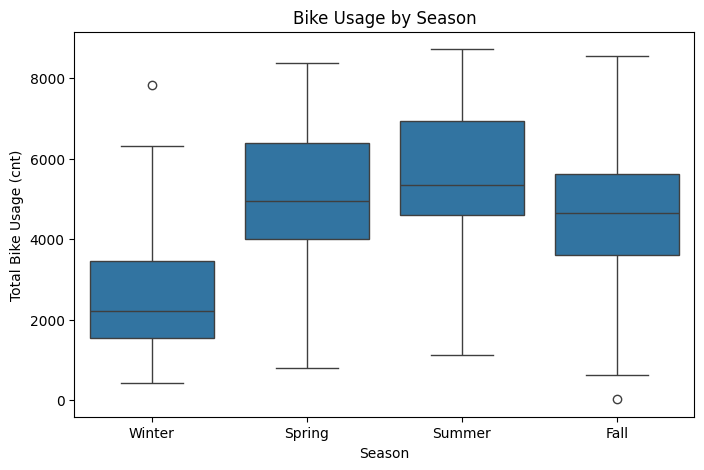

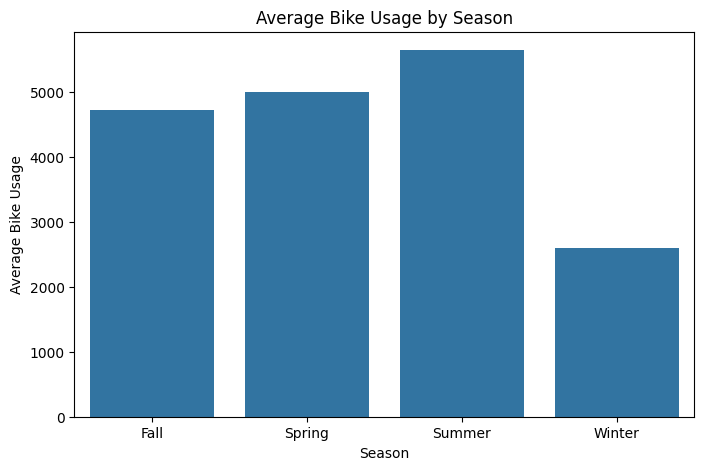

In [30]:
# Mapping season dari kode ke nama musim
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
dday['season_name'] = dday['season'].map(season_mapping)

# Boxplot jumlah penggunaan sepeda berdasarkan musim
plt.figure(figsize=(8, 5))
sns.boxplot(x='season_name', y='cnt', data=dday)
plt.title('Bike Usage by Season')
plt.xlabel('Season')
plt.ylabel('Total Bike Usage (cnt)')
plt.show()

# Rata-rata penggunaan sepeda berdasarkan musim
average_usage_by_season = dday.groupby('season_name')['cnt'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='season_name', y='cnt', data=average_usage_by_season)
plt.title('Average Bike Usage by Season')
plt.xlabel('Season')
plt.ylabel('Average Bike Usage')
plt.show()


**Insight:**
- Dari boxplot, terlihat bahwa penggunaan sepeda tertinggi terjadi di musim panas (Summer), sementara penggunaan sepeda paling rendah terjadi di musim dingin (Winter).
- Grafik rata-rata penggunaan sepeda per musim memperkuat temuan ini. Musim panas menunjukkan rata-rata penggunaan sepeda tertinggi, kemungkinan besar karena cuaca yang lebih mendukung untuk aktivitas luar ruangan.

## Analisis Lanjutan (Opsional
- Scatter plot untuk kelembapan dan penggunaan sepeda
- Scatter plot untuk kecepatan angin dan penggunaan sepeda
- Menghitung korelasi kelembapan dan kecepatan angin terhadap penggunaan sepeda

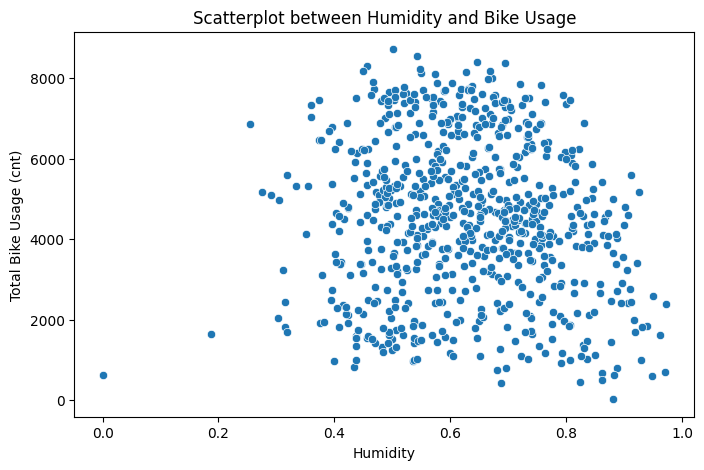

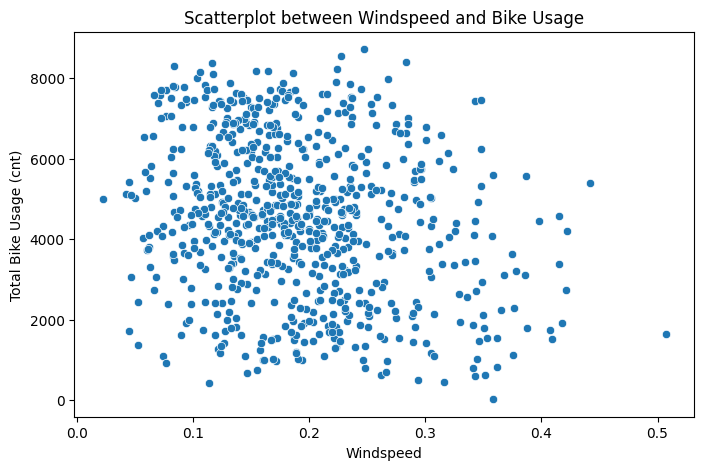

Correlation between humidity and bike usage: -0.10
Correlation between windspeed and bike usage: -0.23


In [31]:
# Scatter plot untuk kelembapan dan penggunaan sepeda
plt.figure(figsize=(8, 5))
sns.scatterplot(x=dday['hum'], y=dday['cnt'])
plt.title('Scatterplot between Humidity and Bike Usage')
plt.xlabel('Humidity')
plt.ylabel('Total Bike Usage (cnt)')
plt.show()

# Scatter plot untuk kecepatan angin dan penggunaan sepeda
plt.figure(figsize=(8, 5))
sns.scatterplot(x=dday['windspeed'], y=dday['cnt'])
plt.title('Scatterplot between Windspeed and Bike Usage')
plt.xlabel('Windspeed')
plt.ylabel('Total Bike Usage (cnt)')
plt.show()

# Menghitung korelasi kelembapan dan kecepatan angin terhadap penggunaan sepeda
correlation_hum_cnt = dday['hum'].corr(dday['cnt'])
correlation_wind_cnt = dday['windspeed'].corr(dday['cnt'])
print(f'Correlation between humidity and bike usage: {correlation_hum_cnt:.2f}')
print(f'Correlation between windspeed and bike usage: {correlation_wind_cnt:.2f}')


## Conclusion

Conclusion Pertanyaan 1:
- Terdapat hubungan positif yang kuat antara suhu dan penggunaan sepeda. Semakin tinggi suhu, semakin banyak sepeda yang digunakan, dengan korelasi sebesar 0.63.

Conclusion Pertanyaan 2:
- Penggunaan sepeda mengikuti pola musiman, di mana jumlah penggunaan tertinggi terjadi di musim panas dan terendah di musim dingin.
- Musim panas memberikan kondisi cuaca yang lebih mendukung aktivitas bersepeda.

Conclusion dari Analisis Lanjutan:
- Kelembapan dan kecepatan angin memiliki pengaruh yang lebih kecil terhadap penggunaan sepeda dibandingkan suhu.
- Kondisi suhu merupakan faktor lingkungan yang paling berpengaruh terhadap jumlah penggunaan sepeda dalam dataset ini.